# K-Nearest Neighbors (K-NN)

K-Nearest Neighbors (K-NN) is a straightforward and intuitive machine learning algorithm employed for classification and regression tasks. This approach belongs to the instance-based learning category, where predictions are made by considering the "k" nearest data points to the input point. Let's delve into the mathematical foundations of the K-NN algorithm:

1. **Assumption: Similar Inputs have similar outputs:**
   The cornerstone of the K-NN algorithm is the assumption that data points with analogous features (inputs) tend to share similar labels (outputs). This notion underpins the K-NN approach to classify a new test input by examining the labels of its k most similar training inputs.
   
2. **Classification rule: For a test input x, assign the most common label amongst its k most similar training inputs:**
   When faced with a fresh test input (denoted as x), the K-NN algorithm identifies the k training inputs (neighbors) that closely resemble x using a specified distance metric. It then designates the label that emerges most frequently among these k neighbors as the anticipated label for the test input x.

3. **Formal definition of k-NN (in terms of nearest neighbors):**
   Let's dissect the formal definition of k-NN {cite:p}`cover1967nearest,Weinberger_kkn_2023`:
   - Test point: x
   - The collection of k nearest neighbors of x is symbolized as $S_x$
   - $S_x$ constitutes a subset of the training data $D$, with $|S_x| = k$
   - For every pair (x', y') in the training data $D$ not within $S_x$, the distance from x to x' exceeds or equals the distance from x to the farthest point in $S_x$:
   \begin{equation}
   \text{dist}(\mathbf{x},\mathbf{x}')\ge\max_{(\mathbf{x}'',y'')\in S_\mathbf{x}} \text{dist}(\mathbf{x},\mathbf{x}'')
   \end{equation}
   
3. **Distance Metric:**
   The initial step in the K-NN algorithm entails selecting a distance metric, which gauges the resemblance or distinction between data points.

    1. **Euclidean Distance:**
       Euclidean distance corresponds to the linear distance between two points in a plane or hyperplane. It equates to measuring the shortest path between these points as if drawing a straight line. This metric provides insight into the extent of displacement between two states of an object.

       Formula:
       \begin{equation}
       d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
       \end{equation}

    2. **Manhattan Distance:**
       The Manhattan distance is apt when total distance traveled by an object is of interest, irrespective of direction. It simulates calculating the distance covered when moving within a city grid pattern. It is computed by summing the absolute differences between coordinates of points in n-dimensional space.

       Formula:
       \begin{equation}
       d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
       \end{equation}

    3. **Minkowski Distance:**
       The Minkowski distance generalizes the Euclidean and Manhattan distances as special cases. The parameter "p" shapes the distance metric. With p = 1, it's akin to the Manhattan distance, and p = 2 corresponds to the Euclidean distance.

       Formula:
       \begin{equation}
       d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^p\right)^{\frac{1}{p}}
       \end{equation}

4. **Training:**
   During training, the algorithm stores feature vectors along with their corresponding class labels from the training dataset.

5. **Prediction:**
   In making predictions for new data points, K-NN follows these steps:
   
   a. **Calculate Distances:**
      Compute the distance between the new data point and all training data points using the chosen distance metric.
   
   b. **Find K Neighbors:**
      Identify the "k" nearest neighbors based on the computed distances.
   
   c. **Majority Voting (Classification) or Average (Regression):**
      For classification tasks, the algorithm tallies the occurrences of each class among the "k" neighbors and designates the class with the highest count as the predicted class. For regression tasks, the algorithm computes the average of the target values of the "k" neighbors to predict the value.

6. **Choosing the Value of K:**
   Selecting the appropriate "k" is pivotal. A smaller "k" might yield noisy predictions, while a larger "k" could smooth decision boundaries. The optimal "k" value hinges on the dataset and the specific problem.

7. **Weighted K-NN (Optional):**
   Weighted K-NN can be employed to grant greater influence to closer neighbors than those farther away. This is accomplished by assigning weights to neighbors inversely proportional to their distances.

8. **Normalization and Scaling (Optional):**
   To prevent dominance by individual features in distance calculations, normalizing or scaling the features is recommended.

It's important to note that K-NN's simplicity and interpretability come with potential limitations, such as reduced efficacy on high-dimensional or feature-irrelevant data due to the curse of dimensionality. Moreover, computation can become intensive for large datasets because of the need to calculate distances for each data point {cite:p}`sklearnUserGuide,cover1967nearest,Weinberger_kkn_2023`.

## Nearest Neighbors Classification 

Explaining the Operation of the K-Nearest Neighbors (Classification) Algorithm

The K-Nearest Neighbors (K-NN) algorithm is a method used to classify a new data point within a dataset containing various classes or categories. It operates by assessing the proximity and similarity of the new data point to the existing data entries. This process is executed in the following sequential steps:

1. **Determination of K-Value**: In the first step, a value is assigned to K, which signifies the number of neighboring data points that will be considered for classification.

2. **Calculation of Distances**: Subsequently, the algorithm computes the distances between the new data point and all the data entries present in the dataset. The specific method for calculating these distances is elaborated upon in subsequent sections. These distances are then arranged in ascending order.

3. **Identification of Nearest Neighbors**: The next step involves the selection of the K nearest neighbors based on the previously computed distances. These neighbors represent the existing data points in the dataset that are most closely related to the new data point.

4. **Classification Assignment**: Finally, the new data point is classified into a specific class or category based on the majority class among its K nearest neighbors. In essence, the class that is most prevalent among these neighbors determines the classification of the new data point.

This method provides a clear and structured approach for understanding the functioning of the K-Nearest Neighbors algorithm. 

<font color='Blue'><b>Example:</b></font>

```{figure} KKN_Example.jpg
---
width: 600px
align: center
---
An example of using KKN.
```

* Panel (a) illustrates a dataset comprising three distinct classes, namely red, green, and blue.

* Moving to Panel (b), a pivotal step is introduced: the assignment of a value to K, which signifies the quantity of neighboring data points to take into account before categorizing the new data entry. For the sake of this explanation, let us assume a value of K equal to 3.

* Continuing in Panel (b), out of the three nearest neighbors depicted in the diagram above, the majority class identified is red. Consequently, the new data entry is designated to belong to the red class.

We can define a simplified KKN classified as follow:

In [1]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        """
        K-Nearest Neighbors Classifier.

        Parameters:
        k (int): Number of neighbors to consider for classification.
        """
        self.k = k

    def fit(self, X, y):
        """
        Fit the KNN model on the training data.

        Parameters:
        X (numpy.ndarray): Training feature data.
        y (numpy.ndarray): Training labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict labels for input data.

        Parameters:
        X (numpy.ndarray): Input feature data.

        Returns:
        numpy.ndarray: Predicted labels for input data.
        """
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Predict a single label for an input data point.

        Parameters:
        x (numpy.ndarray): Input feature data point.

        Returns:
        int: Predicted label for the input data point.
        """
        # This is Euclidean Distance
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


Let's explain the above code:

1. **Initialization:**
   The `KNNClassifier` class is initialized with a parameter `k`, which specifies the number of neighbors to consider for classification.

2. **Training (fit method):**
   In the `fit` method, the model is trained on a labeled dataset. The training feature data is stored in `self.X_train`, and the corresponding labels are stored in `self.y_train`.

3. **Prediction (predict method):**
   In the `predict` method, predictions are made for a set of input feature data points (`X`). For each data point `x` in `X`, the `_predict` method is called to predict its label.

4. **Individual Prediction (_predict method):**
   The `_predict` method is where the core prediction happens for a single data point `x`. Here's how it works:

   a. **Calculate Distances:**
      - For the input data point `x`, the Euclidean distance is computed to all data points in the training set `self.X_train`. The distances are stored in the `distances` list, which contains the Euclidean distance between `x` and each point in the training set.

   b. **Find Nearest Neighbors:**
      - The indices of the `k` data points with the smallest distances are determined using `np.argsort(distances)[:self.k]`. These indices represent the `k` nearest neighbors.

   c. **Count Labels:**
      - The labels of these `k` nearest neighbors are collected from the `self.y_train` array.

   d. **Majority Vote:**
      - Finally, a majority vote is performed among the labels of the `k` nearest neighbors. The label that occurs most frequently is selected as the predicted label for the input data point `x`.

5. **Predict for All Data Points:**
   In the `predict` method, this process is repeated for all data points in the input feature data `X`, and the predicted labels are stored in the `y_pred` list.

6. **Return Predictions:**
   The predicted labels for all input data points are returned as a NumPy array.


`````{admonition} Note
:class: warning

`numpy.linalg.norm` is used to calculate the norm of a vector or a matrix. The norm is a measure of the magnitude or length of a vector or a matrix. There are different types of norms, depending on the value of the ord parameter. For example, the default ord=None means the 2-norm or the Euclidean norm, which is the square root of the sum of squared elements. The ord=1 means the 1-norm or the Manhattan norm, which is the sum of absolute values of elements. The ord=np.inf means the infinity norm, which is the maximum absolute value of elements. You can also specify the axis parameter to compute the norm along a certain axis of the matrix. For more details, you can refer to the [NumPy v1.26 Manual](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

`````

For practical implementation, the widely-used [**KNeighborsClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class from scikit-learn is a powerful tool. This class simplifies the creation of a KNN classifier, its fitting to training data, and the making of predictions for new observations. It wraps the entire process described earlier and provides a range of options for customization, including distance metrics, weighting strategies, and more. Using this class, you can efficiently harness the capabilities of the K-Nearest Neighbors algorithm while enjoying the convenience of a well-designed interface.

<font color='Blue'><b>Example</b></font>: The **Iris Dataset** serves as a quintessential example in explaining cross-validations. Crafted by the eminent British biologist and statistician Ronald A. Fisher in 1936, the dataset finds its roots in the realm of discriminant analysis. Named after the Iris flower species it encapsulates, this dataset stands as a foundational cornerstone in machine learning and statistics.

**Dataset Composition**

This dataset encompasses measurements of four distinct attributes in three diverse species of Iris flowers:

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

The dataset encapsulates three distinct species of Iris flowers:

1. Iris setosa
2. Iris versicolor
3. Iris virginica

Each Iris flower species is accompanied by precisely 50 samples, culminating in a total dataset size of 150 instances.

Before delving into that, let's first examine the distribution of the dataset:

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


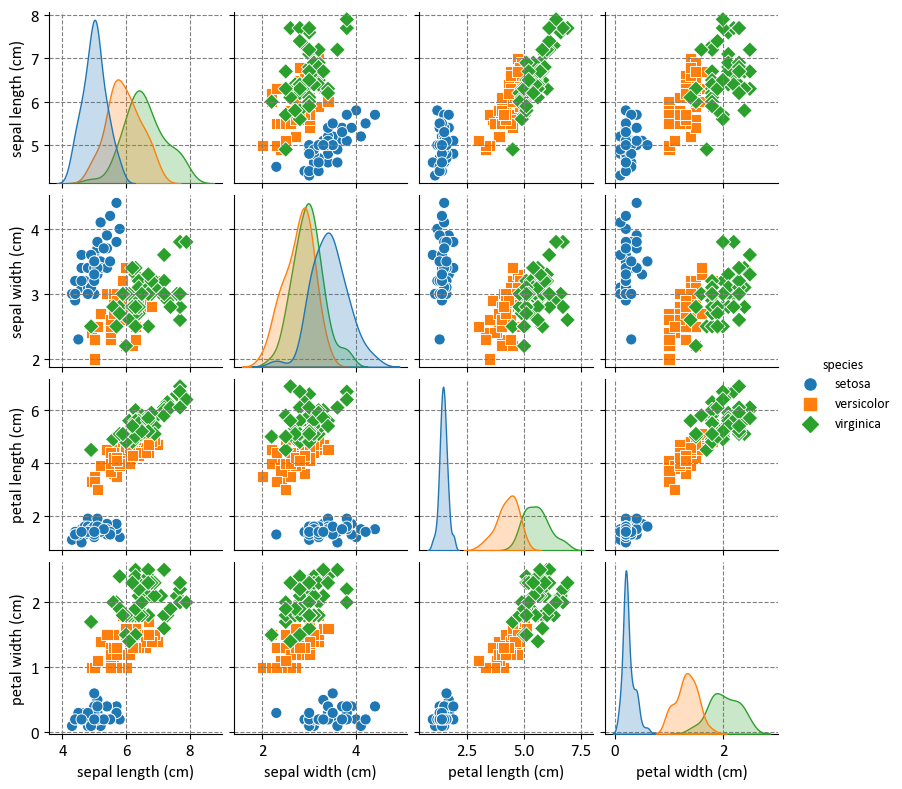

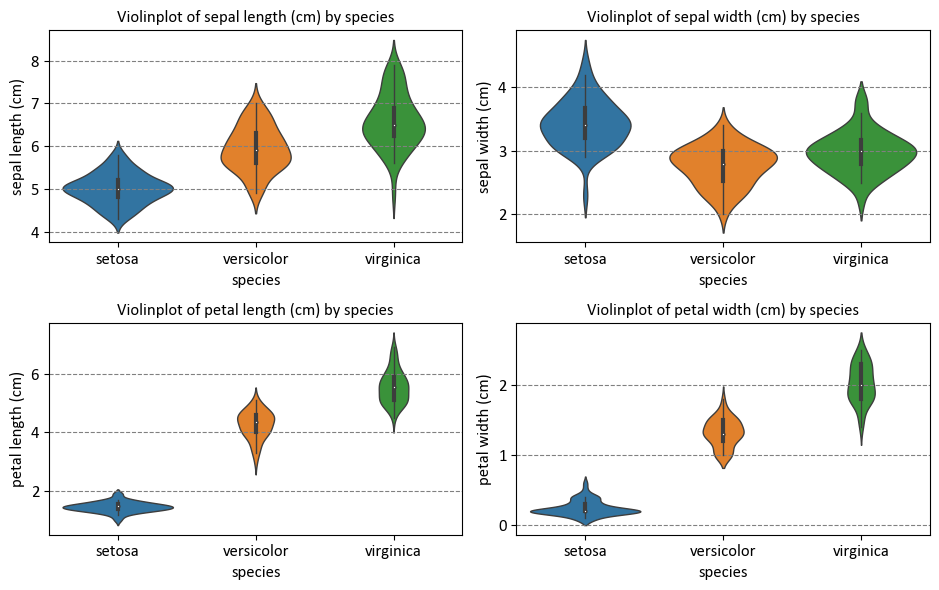

In [2]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
plt.style.use('../mystyle.mplstyle')

# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Print the first few rows of the DataFrame
display(iris_df.head())

# Pairplot: Scatterplots for each pair of features
g = sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"], height = 2)
# _ = g.map_lower(sns.kdeplot, levels=4, color=".2")



# Create a 2x2 grid of subplots with a specified figure size
fig, ax = plt.subplots(2, 2, figsize=(9.5, 6))

# Flatten the 2x2 grid into a 1D array of subplots
ax = ax.ravel()

# Get the column names of the iris DataFrame, excluding the 'species' column
Cols = iris_df.drop(columns=['species']).columns

# Iterate through the columns using enumerate
for c, col in enumerate(Cols):
    # Create a violin plot using Seaborn
    sns.violinplot(x="species", y=col, data = iris_df, ax=ax[c])
    
    # Set the title for the subplot
    ax[c].set_title(f"Violinplot of {col} by species")

# Adjust the layout of the subplots for better visualization
plt.tight_layout()

Classifying using our KKN classifier:

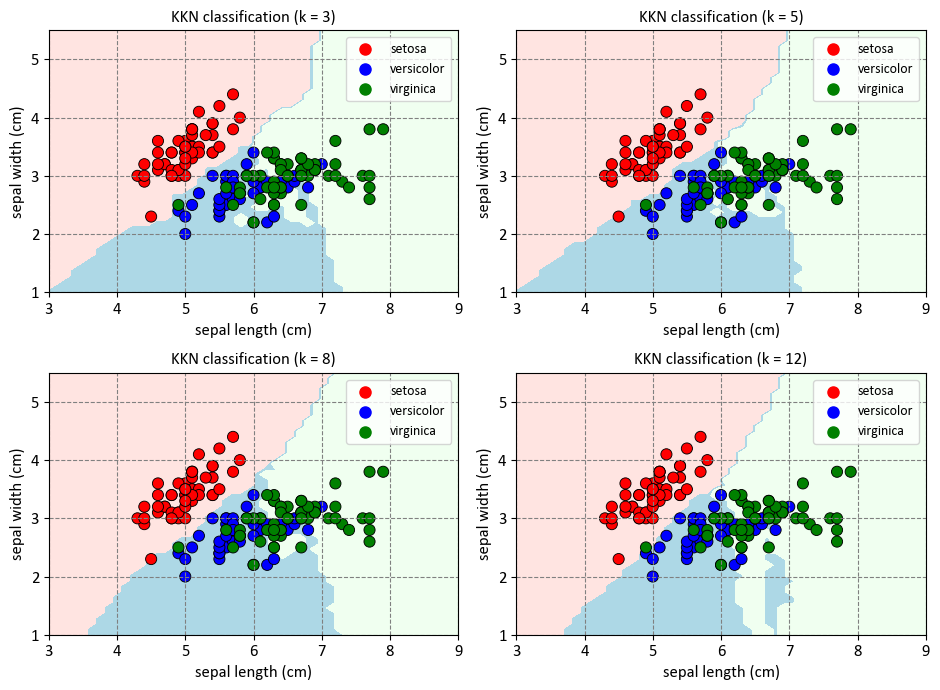

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset
iris = datasets.load_iris()

# Select only the first two features for visualization
X = iris.data[:, :2]
y = iris.target

xlim = [3, 9]
ylim = [1, 5.5]
feature_1, feature_2 = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                                   np.linspace(ylim[0], ylim[1]))
    
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# Create color maps
cmap_light = ListedColormap(["MistyRose", "LightBlue", "HoneyDew"])
cmap_bold = ["Red", "Blue", "Green"]

# Different values of n_neighbors
n_neighbors_values = [3, 5, 8, 12]

# Create a 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(9.5, 7))
axes = axes.ravel()

for ax, n_neighbors in zip(axes, n_neighbors_values):
    # Create a K-Nearest Neighbors classifier
    knn = KNNClassifier(k = n_neighbors)
    knn.fit(X, y)
    # Plot decision boundaries
    y_pred = np.reshape(knn.predict(grid), feature_1.shape)
    display_dbd = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
    display_dbd.plot(ax = ax, cmap=cmap_light)

    # Plot training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)

    # Set the title
    _ = ax.set(xlim = xlim, ylim = ylim,
               xlabel=iris.feature_names[0],
               ylabel=iris.feature_names[1],
               title = "KKN classification (k = %i)" % n_neighbors)

# Adjust the layout of the subplots for better visualization
plt.tight_layout()

We can apply the sklearn's k-Nearest Neighbors (k-NN) algorithm to the Iris dataset, experimenting with different numbers of neighbors: 3, 5, 8, 12, 15, and 20.

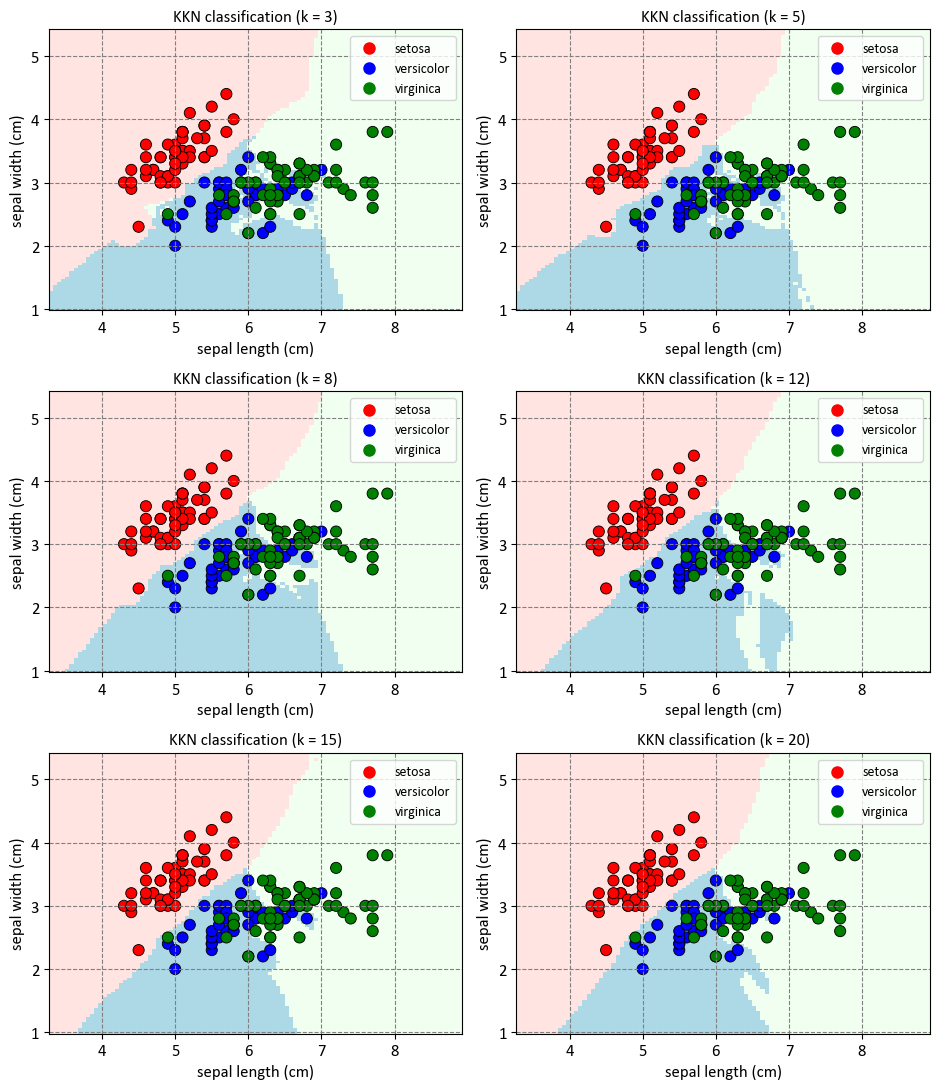

In [4]:
# Different values of n_neighbors
n_neighbors_values = [3, 5, 8, 12, 15, 20]

# Create a 2x2 plot
fig, axes = plt.subplots(3, 2, figsize=(9.5, 11))
axes = axes.ravel()

for ax, n_neighbors in zip(axes, n_neighbors_values):
    # Create a K-Nearest Neighbors classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
    clf.fit(X, y)
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cmap_light, ax=ax,
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel=iris.feature_names[0],
                                           ylabel=iris.feature_names[1],
                                           shading="auto")

    # Plot training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)

    # Set the title
    _ = ax.set(title = "KKN classification (k = %i)" % n_neighbors)
    

# Adjust the layout of the subplots for better visualization
plt.tight_layout()

## Scenarios where KNN is Used

1. **Small to Medium-Sized Datasets**: KNN performs well on datasets of modest size, where the computational cost of calculating distances between data points remains manageable.

2. **Nonlinear Data**: KNN excels in handling complex and nonlinear decision boundaries. It can capture intricate relationships between features that might not be captured by linear classifiers.

3. **Multi-Class Classification**: KNN is naturally suited for multi-class classification tasks. It assigns a class label based on the majority class among the K nearest neighbors.

4. **Lazy Learning**: KNN is considered a lazy learning algorithm. It doesn't create an explicit model during training, which can be advantageous in situations where the underlying data distribution is unknown or subject to frequent changes.

5. **No Assumptions about Data Distribution**: KNN is non-parametric and doesn't make any assumptions about the distribution of the data. This makes it valuable when the data distribution is complex or unclear.

6. **Prototype-Based Learning**: KNN can be viewed as a prototype-based learning method. It classifies new instances by comparing them to existing instances in the training set.

7. **Feature Selection and Exploration**: KNN's simplicity can aid in feature selection and exploration. It can help identify influential features by observing how the choice of neighbors impacts classification.

8. **Imbalanced Datasets**: KNN can be adapted to handle imbalanced datasets by assigning different weights to neighbors or utilizing techniques to address class imbalances.

9. **Anomaly Detection**: KNN can identify anomalies by flagging observations that are significantly dissimilar from their neighbors.

10. **Collaborative Filtering**: In recommendation systems, KNN is used for collaborative filtering. It identifies similar users or items based on interaction patterns, enabling personalized recommendations.

11. **Initial Baseline Model**: KNN serves as a starting point in model building. It provides a baseline performance that other, more complex algorithms can be compared against.

## Advantages of KNN

- **Flexibility**: KNN can handle various types of data and doesn't impose strong assumptions about the data's distribution.
- **Simple Concept**: The algorithm's concept is easy to understand and implement, making it accessible to beginners.
- **Intuitive Interpretation**: The classifications made by KNN can often be interpreted intuitively by examining the nearest neighbors.

## Limitations of KNN

- **Computational Cost**: As the dataset grows, calculating distances between data points becomes computationally intensive, leading to longer processing times.
- **Curse of Dimensionality**: KNN's performance degrades in high-dimensional spaces due to the curse of dimensionality. In such cases, data points tend to be equidistant, making nearest neighbors less meaningful.
- **Sensitive to Noise**: Outliers or noisy data points can significantly affect KNN's predictions, leading to suboptimal results.
- **Choosing K**: Selecting the appropriate number of neighbors (K) can be challenging and can impact the algorithm's performance.
- **Scaling**: Features with different scales can dominate the distance calculations, leading to biased results.

KNN is valuable in scenarios where data isn't too high-dimensional, and computational resources are sufficient for distance calculations. While it's not a panacea, KNN serves as a benchmark algorithm, a quick baseline model, and a starting point for more advanced techniques. Understanding its strengths and limitations is crucial for effectively applying KNN in various real-world scenarios {cite:p}`singh2023machine`.

## Example: Synthetic Dataset

<font color='Blue'><b>Example</b></font>: In this code example, a Decision Tree Classifier is utilized to illustrate decision boundaries on synthetic data. The synthetic dataset is generated using the `make_blobs` function from scikit-learn, designed for creating artificial datasets for various machine learning experiments. This particular dataset consists of the following characteristics:

- **Number of Samples:** 2000
- **Number of Features:** 2
- **Number of Classes:** 4
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 2000 data points, each described by a pair of feature values. These features are represented as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of two distinct classes, identified as 'Class 0',  'Class 1',  'Class 2', and 'Class 3'.

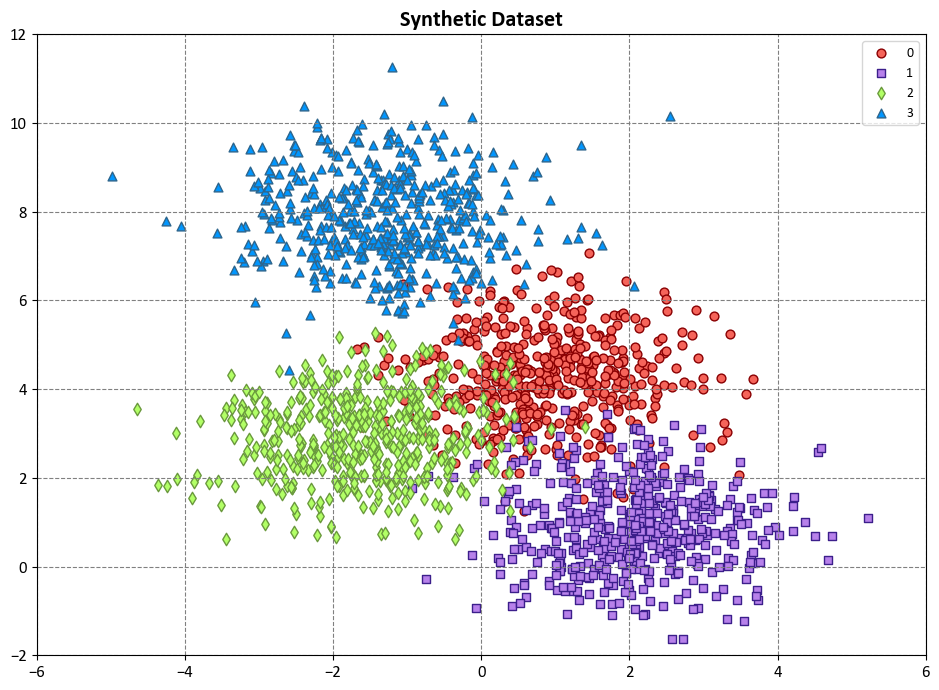

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=2000, centers=4, random_state=0, cluster_std=1.0)

# Create a DataFrame
Data = pd.DataFrame(data=X, columns=['Feature %i' % (i + 1) for i in range(2)])
Data['Outcome'] = y

# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 1, figsize=(9.5, 7))

colors = ["#f5645a", "#b781ea", '#B2FF66', '#0096ff']
edge_colors = ['#8A0002', '#3C1F8B','#6A993D', '#2e658c']
cmap_light = ListedColormap(['#fdceca', '#ebdbfa', '#e9ffd3', '#c0def4'])
markers = ['o', 's', 'd', '^']
cmap_ = ListedColormap(colors)

# Scatter plot of data points
for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                s=40, edgecolors= edge_colors[num], marker=markers[num], label=str(num))

ax.set(xlim=[-6, 6], ylim=[-2, 12])
ax.legend()
ax.set_title('Synthetic Dataset', weight = 'bold', fontsize = 16)
plt.tight_layout()

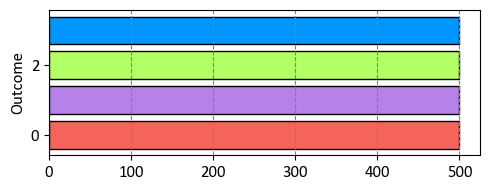

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5, 2))
ax.barh(np.unique(y, return_counts=True)[0], np.unique(y, return_counts=True)[1], color=colors, edgecolor='k')
ax.set_ylabel('Outcome')
ax.grid(which='major', axis='y')
plt.tight_layout()

`````{admonition} Remark
:class: important

In the realm of machine learning and data analysis, a crucial step is the stratified train and test data split, typically carried out using the Scikit-Learn library in Python. This process aids in the evaluation of model performance by creating representative training and testing datasets.

To execute a stratified split using Scikit-Learn, you can employ the `train_test_split` function from the `sklearn.model_selection` module. Stratification ensures that the distribution of class labels in both the training and testing sets is similar to the original dataset, which is particularly useful when dealing with imbalanced datasets.

Here's a code snippet illustrating this process:

```python
from sklearn.model_selection import train_test_split

# X represents your feature data, and y represents the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
```

In this code, `X` refers to your feature matrix, `y` represents the target variable, and the `test_size` parameter specifies the proportion of data allocated to the test set. By setting the `stratify` parameter to `y`, you ensure that the class distribution in the training and testing sets closely mirrors that of the original data. The `random_state` parameter is used to maintain reproducibility.

This stratified train and test split methodology is a fundamental practice in machine learning to prevent bias in model evaluation and validation.

`````

In [7]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split the DataFrame into train and test DataFrames
train_data, test_data = train_test_split(Data, test_size=0.25, stratify = Data['Outcome'], random_state=42)

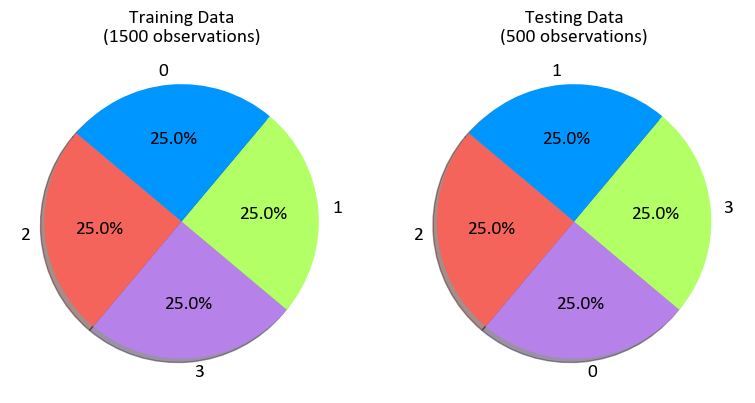

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_training_testing_pie_charts(train_data, test_data, test_size=0.25, colors=None):

    # Calculate the total number of observations in the training and testing datasets
    train_total = len(train_data)
    test_total = len(test_data)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    for ax, data, title in zip((ax1, ax2), (train_data, test_data), ('Training', 'Testing')):
        wedges, texts, autotexts = ax.pie(data['Outcome'].value_counts(), labels=data['Outcome'].value_counts().index,
                autopct='%1.1f%%', startangle=140, shadow=True, colors=colors)
        ax.set_title(f'{title} Data\n({train_total if title == "Training" else test_total} observations)', fontsize=14)

        # Add count values as annotations with a larger font size
        for text, autotext in zip(texts, autotexts):
            text.set(size=14)
            autotext.set(size=14)

    plt.tight_layout()
    plt.show()

plot_training_testing_pie_charts(train_data, test_data, test_size=0.25, colors=colors)

It is evident that the 1500 instances in the training set have been categorized into four groups. Similarly, the test set's four categories have also been divided into their respective groups.

Training a model with `n_neighbors = 5`:

In [9]:
# Split 'train_data' into X_train (features) and y_train (labels)
X_train = train_data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the label column
y_train = train_data['Outcome']

# Split 'test_data' into X_test (features) and y_test (labels)
X_test = test_data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the label column
y_test = test_data['Outcome']

In [10]:
# Import the necessary class from scikit-learn
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
KKN = KNeighborsClassifier(n_neighbors = 5)

# Fit the KNN classifier to the training data
KKN.fit(X_train, y_train)

def _gen_cr(model, X, y):
    y_pred = model.predict(X)
    Results = pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)).T
    display(Results.style.format(precision = 3))
    
print('\nTrain Data:')
_gen_cr(KKN, X_train, y_train)

print('\nTest Data:')
_gen_cr(KKN, X_test, y_test)


Train Data:


,precision,recall,f1-score,support
0,0.902,0.912,0.907,375.000
1,0.967,0.952,0.960,375.000
2,0.942,0.947,0.944,375.000
3,0.987,0.987,0.987,375.000
accuracy,0.949,0.949,0.949,0.949
macro avg,0.950,0.949,0.949,1500.000
weighted avg,0.950,0.949,0.949,1500.000



Test Data:


,precision,recall,f1-score,support
0,0.858,0.872,0.865,125.000
1,0.967,0.944,0.955,125.000
2,0.889,0.896,0.892,125.000
3,0.992,0.992,0.992,125.000
accuracy,0.926,0.926,0.926,0.926
macro avg,0.927,0.926,0.926,500.000
weighted avg,0.927,0.926,0.926,500.000


The results can be visualized as follows:

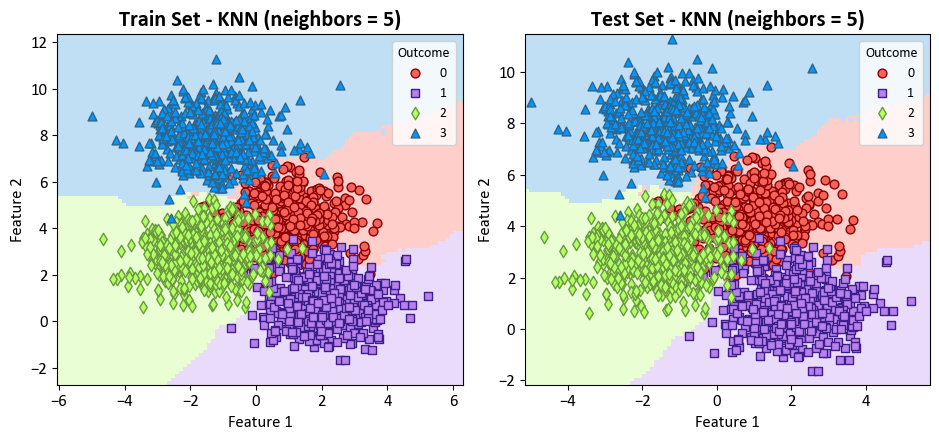

In [11]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Create a loop for train and test sets
for i, (X_set, y_set, title) in enumerate([(X_train, y_train, 'Train Set'), (X_test, y_test, 'Test Set')]):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(KKN, X_set, cmap=cmap_light, ax=ax[i],
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto")
    
    # Scatter plot of data points
    for num in np.unique(y):
        ax[i].scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                    s=40, edgecolors= edge_colors[num], marker=markers[num], label=str(num))
        
    ax[i].legend(title="Outcome")
    ax[i].set_title(f'{title} - KNN (neighbors = 5)', fontweight='bold', fontsize=16)
    ax[i].grid(False)

plt.tight_layout()

Inaccurate Predictions:

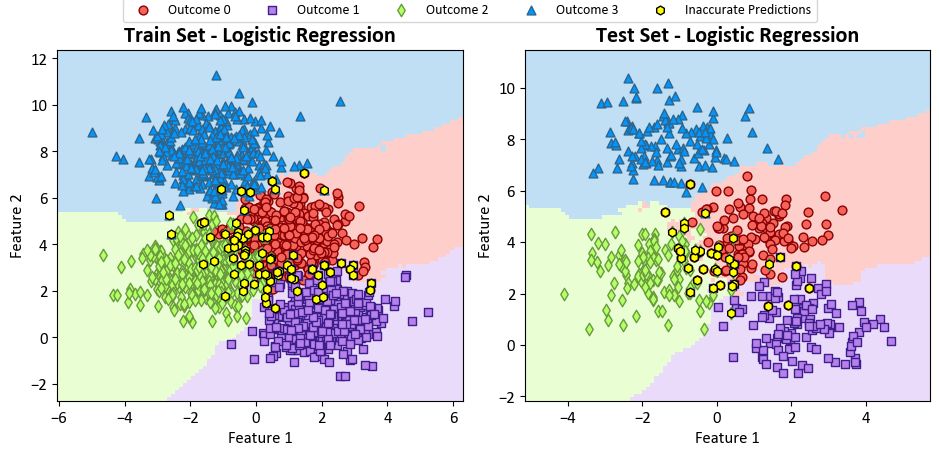

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Create a loop for train and test sets
for i, (X_set, y_set, title) in enumerate([(X_train, y_train, 'Train Set'), (X_test, y_test, 'Test Set')]):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(KKN, X_set, cmap=cmap_light, ax=axes[i],
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto")
    for num in np.unique(y):
        axes[i].scatter(X_set.loc[y_set == num].values[:, 0], 
                        X_set.loc[y_set == num].values[:, 1],
                        c = colors[num], s=40,
                        edgecolors = edge_colors[num],
                        marker=markers[num], label= f'Outcome {num}')
        
    # Plot data points where y_set and log_reg(X_set) differ in color
    diff_points = X_set[y_set != KKN.predict(X_set)]  # Filter points where predictions differ
    
    axes[i].scatter(diff_points.values[:, 0], 
                    diff_points.values[:, 1], 
                    fc='Yellow', ec='black',
                    s = 40, marker= 'h', label= 'Inaccurate Predictions')
    
    axes[i].set_title(f'{title} - Logistic Regression', fontweight='bold', fontsize=16)
    axes[i].grid(False)
    # Remove the legend for each panel
    axes[i].legend()
    axes[i].get_legend().remove()

# Create a single legend for both subplots at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, borderaxespad= -0.1)
plt.tight_layout()

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_cm(model, X_train, X_test, y_train, y_test, class_names, figsize=(7, 4), normalize = False):
    # Create a figure and axes for displaying confusion matrices side by side
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    datasets = [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]

    for i in range(2):
        X, y, dataset_name = datasets[i]
        
        # Compute confusion matrix for the dataset predictions
        cm = confusion_matrix(y, model.predict(X))
        if normalize:
            cm = np.round(cm/cm.sum(axis = 1), 2)
            fig.suptitle('Confusion Matrices (Normalized)', fontsize=16, weight = 'bold')
        else:
            fig.suptitle('Confusion Matrices', fontsize=16, weight = 'bold')
        # Create a ConfusionMatrixDisplay and plot it on the respective axis
        cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)\
                        .plot(ax=ax[i],
                              im_kw=dict(cmap='Greens' if dataset_name == 'Train' else 'Blues'),
                              text_kw={"size": 16}, colorbar=False)
        ax[i].set_title(f'{dataset_name} Data')
        ax[i].grid(False)

    # Adjust the layout for better spacing
    plt.tight_layout()

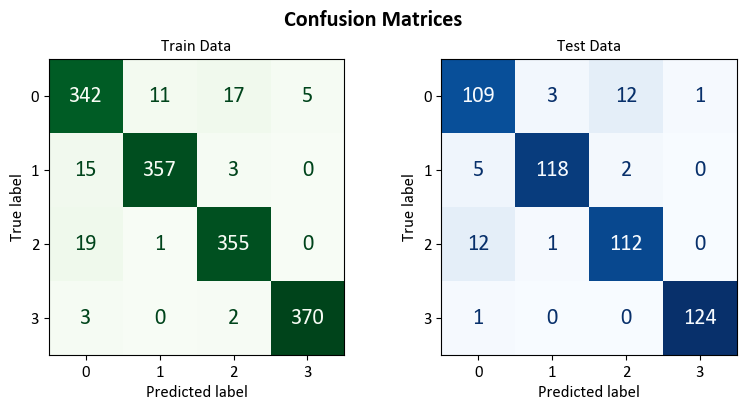

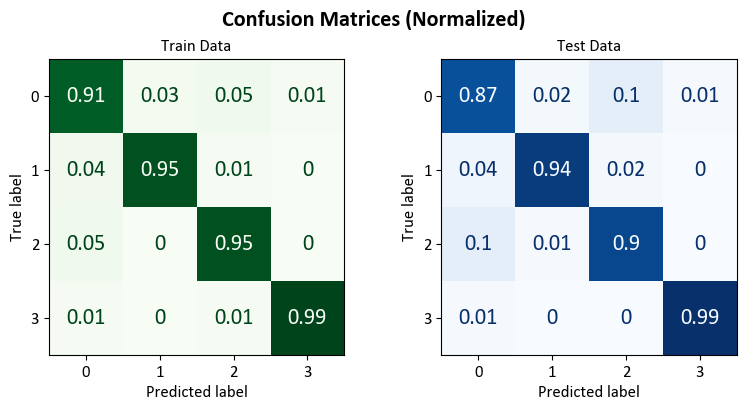

In [14]:
plot_cm(KKN, X_train, X_test, y_train, y_test, np.unique(y).astype('str'), figsize=(8, 4))
plot_cm(KKN, X_train, X_test, y_train, y_test, np.unique(y).astype('str'), figsize=(8, 4), normalize=True)

## Nearest Neighbors Regression (Optional Content)

Nearest Neighbors regression, also known as k-Nearest Neighbors regression (k-NN regression), is a non-parametric algorithm that predicts continuous variables by averaging the output values of the k most similar instances in the training data. The algorithm has three main steps {cite:p}`sklearnUserGuide,cover1967nearest,Weinberger_kkn_2023`:

1. **Distance Metric:** Define a distance metric, such as Euclidean distance, to measure the similarity between instances based on their features. The distance metric is used to find the k nearest neighbors for a given input.

   \begin{equation} d(X_i, X_j) = \sqrt{\sum_{k=1}^{n}(X_{ik} - X_{jk})^2} \end{equation}

   where $n$ is the number of features.

2. **Nearest Neighbors Selection:** Find the k nearest neighbors in the training data based on the distance metric.

3. **Regression Prediction:** Compute the predicted output $Y_{\text{pred}}$ for the input $X$ as the mean of the output values of its k nearest neighbors:

   \begin{equation} Y_{\text{pred}}(X) = \frac{1}{k}\sum_{i=1}^{k} Y_i \end{equation}

   This approach assumes equal weighting for all neighbors. Alternatively, one can use weighted averaging, which gives more weight to closer neighbors.

The choice of the hyperparameter $k$ affects the model's performance. A smaller $k$ makes the model more flexible and responsive to local variations, but also more prone to noise. A larger $k$ makes the model smoother and more robust, but also more biased. Therefore, choosing an appropriate $k$ and distance metric is crucial for k-NN regression.

[Sklearn's kNN regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) is implemented through the KNeighborsRegressor class, which has various parameters that you can adjust to customize the algorithm. Some of the most important parameters are:

- n_neighbors: This is the number of neighbors to use for the prediction. You can choose any positive integer, but a common choice is 5. The optimal value depends on the nature of the problem and the data. A smaller n_neighbors makes the model more flexible and responsive to local variations, but also more prone to noise. A larger n_neighbors makes the model smoother and more robust, but also more biased.
- weights: This is the weight function used in the prediction. You can choose between 'uniform' and 'distance', or provide your own callable function. 'Uniform' means that all points in each neighborhood are weighted equally. 'Distance' means that points are weighted by the inverse of their distance, so that closer neighbors have more influence than farther ones. A custom function can take an array of distances and return an array of weights.
- algorithm: This is the algorithm used to compute the nearest neighbors. You can choose between 'auto', 'ball_tree', 'kd_tree', and 'brute'. 'Auto' means that sklearn will try to choose the best algorithm based on the data. 'Ball_tree' and 'kd_tree' are tree-based algorithms that can speed up the search for large datasets. 'Brute' means that sklearn will use a brute-force search, which is simple but slow.
- metric: This is the metric used to measure the distance between points. You can choose any valid metric from scipy.spatial.distance, such as 'euclidean', 'manhattan', 'minkowski', etc. You can also provide your own callable function that takes two arrays representing 1D vectors and returns a scalar distance. The default metric is 'minkowski', which is a generalization of 'euclidean' and 'manhattan' when p=2 and p=1, respectively.

<font color='Blue'><b>Example - KKN Regressor for Auto MPG Dataset:</b></font> In this example, we focus on the Auto MPG dataset, which is sourced from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg). Comprising 398 observations across 9 variables, the dataset provides insights into the fuel efficiency and pertinent characteristics of diverse car models. The primary objective is to showcase the implementation of the k-NN Regressor within this context.

| **Feature**    | **Description**                                                                                                |
|----------------|----------------------------------------------------------------------------------------------------------------|
| MPG            | Fuel efficiency in miles per gallon. Higher values indicate superior fuel efficiency.                        |
| Cylinders      | Number of engine cylinders, denoting engine capacity and power. Common values include 4, 6, and 8 cylinders.    |
| Displacement   | Engine volume in cubic inches or cubic centimeters, reflecting engine size and power. Higher values signify greater power. |
| Horsepower     | Engine horsepower, gauging its ability to perform work. Higher values indicate a more potent engine. |
| Weight         | Vehicle mass in pounds or kilograms, influencing fuel efficiency. Lighter vehicles typically exhibit enhanced MPG. |
| Acceleration   | Vehicle acceleration performance, usually measured in seconds to reach 60 mph (or 100 km/h) from a standstill. |
| Model Year     | Year of vehicle manufacturing, valuable for tracking technological and efficiency trends. |
| Origin         | Country or region of vehicle origin, often a categorical variable. Values: 1 (USA), 2 (Germany), 3 (Japan), and more. |
| Car Name       | Name or model of the car, facilitating identification and categorization of different car models. |

In [2]:
import pandas as pd
import numpy as np
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', delim_whitespace=True).dropna()

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name']).reset_index(drop= True)

auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
auto_mpg_df.rename(columns = {'MPG' : 'ln(MPG)'}, inplace = True)

# Display the resulting DataFrame
display(auto_mpg_df)

,ln(MPG),Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,2.890372,8,307.0,130.0,3504.0,12.0,70,1
1,2.708050,8,350.0,165.0,3693.0,11.5,70,1
2,2.890372,8,318.0,150.0,3436.0,11.0,70,1
3,2.772589,8,304.0,150.0,3433.0,12.0,70,1
4,2.833213,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,3.295837,4,140.0,86.0,2790.0,15.6,82,1
388,3.784190,4,97.0,52.0,2130.0,24.6,82,2
389,3.465736,4,135.0,84.0,2295.0,11.6,82,1
390,3.332205,4,120.0,79.0,2625.0,18.6,82,1


First, we can explore the influence of the `n_neighbors` parameter in the KNeighborsRegressor.

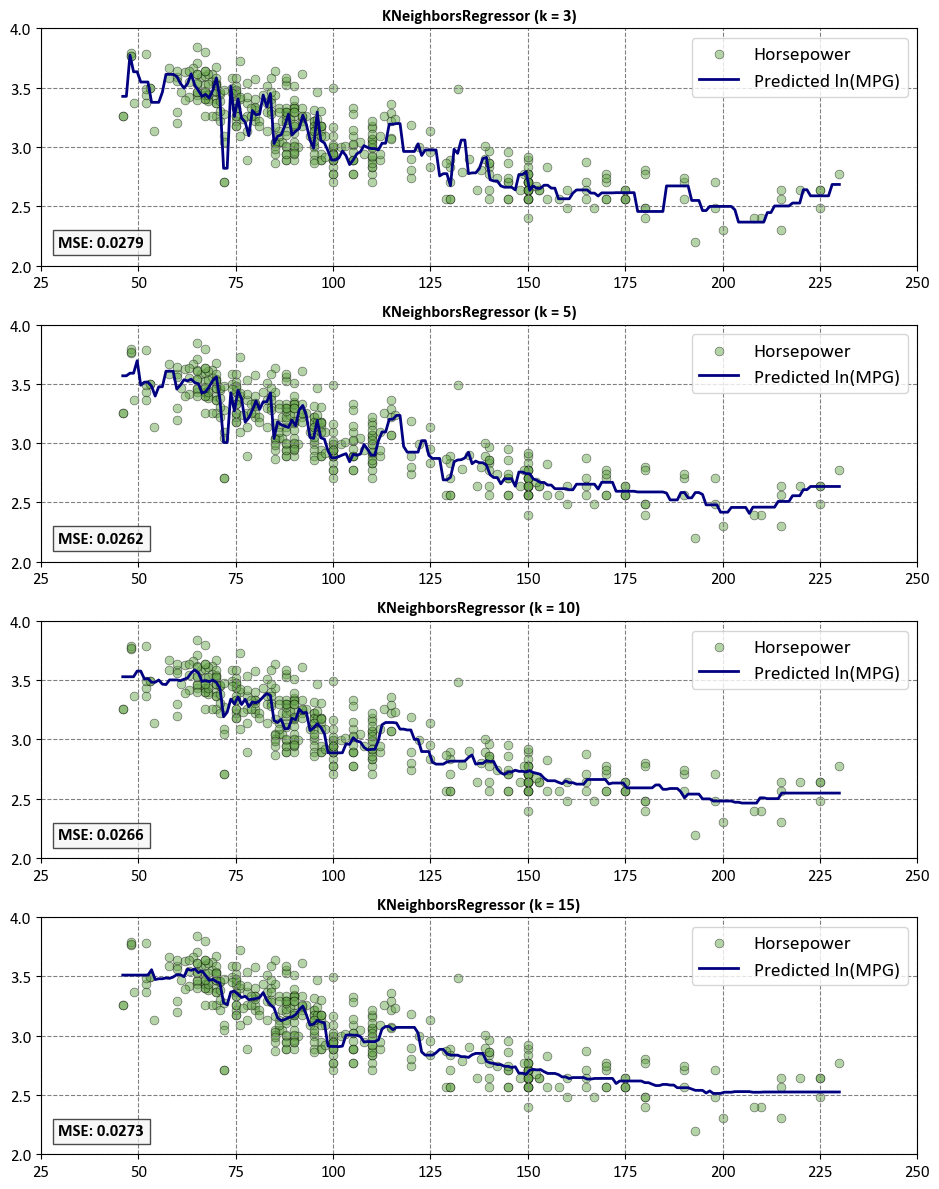

In [84]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare the input features and target variable
X = auto_mpg_df['Horsepower'].values.reshape(-1, 1)
y = auto_mpg_df['ln(MPG)'].values
T = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

plt.style.use('../mystyle.mplstyle')
n_neighbors = 10

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(9.5, 12))

# Define common style parameters
scatter_params = {'s': 40, 'c': '#6aa84f', 'ec': 'k', 'lw': 0.5, 'label': 'Horsepower', 'alpha': 0.5}
plot_params = {'color': 'navy', 'label': 'Predicted ln(MPG)', 'lw': 2}

for i, (ax, n_neighbors) in enumerate(zip(axes, [3, 5, 10, 15])):
    # Create KNeighborsRegressor
    knn = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors, weights= 'uniform')
    _ = knn.fit(X, y)
    
    # Make predictions
    y_ = knn.predict(T)

    # Scatter plot for input features
    ax.scatter(X, y, **scatter_params)
    
    # Line plot for predictions
    ax.plot(T, y_, **plot_params)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, knn.predict(X))

    # Set common style parameters
    ax.axis("tight")
    ax.legend(fontsize=14)
    ax.set_title(f"KNeighborsRegressor (k = {n_neighbors})", weight='bold')
    ax.set(xlim=[25, 250], ylim=[2, 4])
    
    # Display MSE at the bottom left of each plot
    ax.text(0.02, 0.08, f'MSE: {mse:.4f}',
            transform=ax.transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))
        
# Adjust layout
plt.tight_layout()

Next, we can explore the influence of the `weights` parameter in the KNeighborsRegressor.

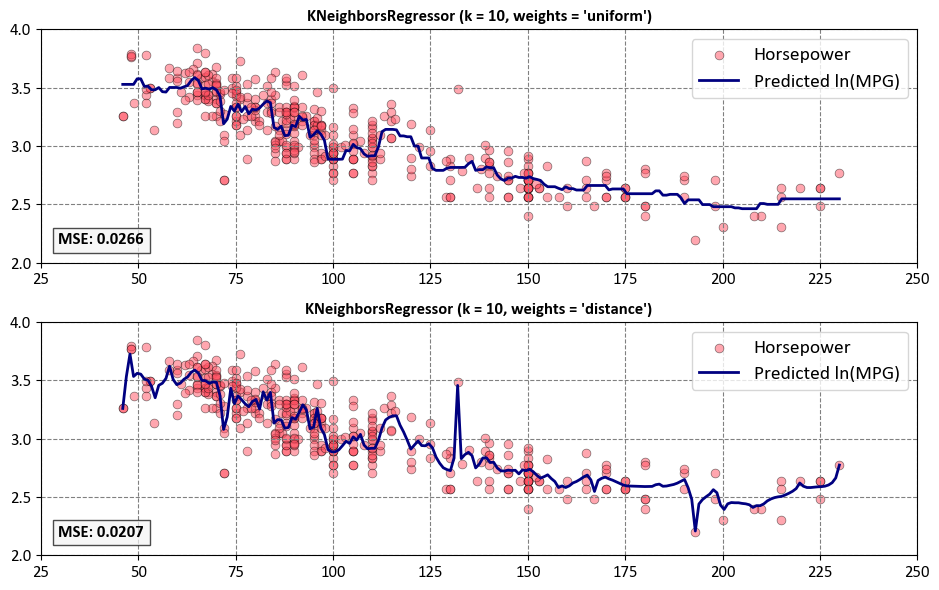

In [85]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare the input features and target variable
X = auto_mpg_df['Horsepower'].values.reshape(-1, 1)
y = auto_mpg_df['ln(MPG)'].values
T = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

plt.style.use('../mystyle.mplstyle')
n_neighbors = 10

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 6))

# Define common style parameters
scatter_params = {'s': 40, 'c': '#ff4f61', 'ec': 'k', 'lw': 0.5, 'label': 'Horsepower', 'alpha': 0.5}
plot_params = {'color': 'navy', 'label': 'Predicted ln(MPG)', 'lw': 2}

for i, (ax, weights) in enumerate(zip(axes, ["uniform", "distance"])):
    # Create KNeighborsRegressor
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    _ = knn.fit(X, y)
    
    # Make predictions
    y_ = knn.predict(T)

    # Scatter plot for input features
    ax.scatter(X, y, **scatter_params)
    
    # Line plot for predictions
    ax.plot(T, y_, **plot_params)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, knn.predict(X))

    # Set common style parameters
    ax.axis("tight")
    ax.legend(fontsize=14)
    ax.set_title(f"KNeighborsRegressor (k = {n_neighbors}, weights = '{weights}')", weight='bold')
    ax.set(xlim=[25, 250], ylim=[2, 4])
    
    # Display MSE at the bottom left of each plot
    ax.text(0.02, 0.08, f'MSE: {mse:.4f}',
            transform=ax.transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))
        
# Adjust layout
plt.tight_layout()